<a href="https://colab.research.google.com/github/Rgarlay/PWSkills_Assignments/blob/main/Assignment%3A%20Linear%20regression%20and%20evaluation%20metrics/Linear_regression_and_evaluation_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Theoratical Questions




###1. What does R-squared represent in a regression model.

It represents how well the variance of target variable is explained by feature variable.
High R_squred value infers strong most of the variance of dependent feature is explained from independent feature and vice verca.


###2. What are the assumptions of linear regression?

1. Homoscedasticity

2. Independence of features

3. Absense of Multicolinearity.

4. Linearity trend with target and feature variable.


###3. What is the difference between R-squared and Adjusted R-squared?

R-squared only displays the ratio of explained variance to total variance.
Adjusted R-square also incorporates if adding more features improve the model's predictability.

R-squared only increases and saturates.
Adj. R-squared can increase and then decrease.

R-squared value ranges from 0 to 1.
Adj. R-squared can be negative when number of features superceede number of data points.






###4. Why do we use Mean Squared Error (MSE)?

To evalue the quality of our model in predicting the target variable.

>MSE is robust to direction of error.

>MSE function is continuous and differentiable.

>It has a global minina, making it possible to minimise error.


###5. What does an Adjusted R-squared value of 0.85 indicate?

Adj. R-Squared is given as

```
Adj. R-squared = 1 - \frac{(1-R^2)(n-1)}{n-k-1}
```

Adj. R-squared value predicts that most of the variance of target variable is predicted by the independent feature.


###6. How do we check for normality of residuals in linear regression?

Normality of residuals confirm an important assumption of the linear regression.
`homoscedastcity`
If this is violated, linear regression model is not effective in modeling.

###7. What is multicollinearity, and how does it impact regression?

Multicollinearity is high collinearity among the predicting features.

Multicollinearity in model can lead to:

>Reducing interpretability.

>Increase complexity in model relations and increase in computational power.

>Overfitting

###8. What is Mean Absolute Error (MAE)?

Mean absolute error is a metric to test the regression model.

```
MAE = (1/n)(sum(|y_real - y_pred|))
```

>It is interpretable.

>It has same units as target_variable.

>It is immune to direction of error.

>It is less sensitive to outliers.

###9.  What are the benefits of using an ML pipeline?

It is upto industry standards.

Pipelines makes intergrability and modifications easy.

It is efficent in scaling and saves time by avoiding repetetion.

###10. Why is RMSE considered more interpretable than MSE?

RMSE has same units as the target variable.

The result has same magnitude order of target variable.


###11. What is pickling in Python, and how is it useful in ML?

Pickling is the process of converting python object into byte stream, so that it can be saved or transferred.

It can be later deconscruted and retrive into its raw state.

This allows us to save and transfer ml models over a network , or work with pre trained models.

###12. What does a high R-squared value mean?

It means that a big part of the variance of target data label is explained by the model.

###13. What happens if linear regression assumptions are violated?

Then the model will perform poorly and will not be able to capture the pattern in model and will underfit.

###14. How can we address multicollinearity in regression?

What we can do:- We can delete the feature one by one till model's features have low correlation.

Methods:- VIF:- Variance Inflation.

RFE:- Recirsive feature elemination.

PCA:- Principle component analysis.

###15.  How can feature selection improve model performance in regression analysis?

It makes the model simpler.

It reduces computation required power.

It reduces overfitting.

It makes model more interpretable.

It reduces multicollinearity.

###16. How is Adjusted R-squared calculated?

```
Adj. R-squared = 1 - \frac{(1-R^2)(n-1)}{n-k-1}
```
n = no. of data points

k = no. of features.

R^2 = R_squared value


###17. Why is MSE sensitive to outliers?

It squares the difference between predicted and actual data point, if a data point is far away from predicted line, it will have high square value. Consequently, the model will pay more attention to minimizing it, making model worse overall.

###18. What is the role of homoscedasticity in linear regression?

Homoscedasticity is the constant variance of the residuals.

This is an important assupmption of the linear regression.

If this is violated, then it means that there is some pattern underneath within the features that is not captued by model.

###19. What is Root Mean Squared Error (RMSE)?

Its the root of MSE.
Its an important evaluation metric in regression.
It is:

Interpretable.

in same order of magnitude and unit as target variable.

It has continuous and differnetiable functinoal form.

###20. Why is pickling considered risky?

Vulnerable to corrpution.

May not be compatible accros differnet python versions.



###21. What alternatives exist to pickling for saving ML models?

Saving objects in ptehr formats like joblib or HDF5.

Its safer for ML pickling.



###22. What is heteroscedasticity, and why is it a problem?

Heteroscedasicity means that the variance of the residuals are not constant.

This is problematic in linear regression, beacuase this could be an indication that the data is not entirely or sufficently independent.

This could lead to features influencing each other and affecting each other's weight coefficent, ultimately leading to a model with bad fit on training data.

###23.  How can interaction terms enhance a regression model's predictive power?

Interaction terms can increase multicollinearity, thus decreasing th model's power.


#Practical Questions

###1. 1. Write a Python script to visualize the distribution of errors (residuals) for a multiple linear regression model using Seaborn's "diamonds" dataset.

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline

In [35]:
diamonds = sns.load_dataset('diamonds')
df = diamonds[['depth', 'table', 'price', 'x', 'y',
       'z']]

In [5]:



lr = LinearRegression()
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=42)
lr.fit(x_train,y_train)

y_train_pred = lr.predict(x_train)

In [11]:
error = y_train - y_train_pred

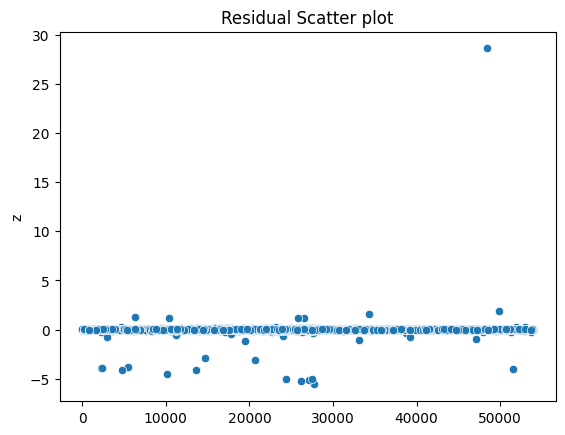

In [14]:
sns.scatterplot(error)
plt.title('Residual Scatter plot')
plt.show()

###2.  Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) for a linear regression model.

In [33]:
def metrics(y_test,y_pred):
  from sklearn.metrics import root_mean_squared_error,mean_absolute_error,mean_squared_error
  import pandas as pd
  y1 = mean_squared_error(y_test,y_pred)
  y2 = root_mean_squared_error(y_test,y_pred)
  y3 = mean_absolute_error(y_test,y_pred)

  df = pd.DataFrame({'MSE':[y1],"RMSE":[y2],"MAE":[y3]})
  return df

df_1 = metrics(y_train,y_train_pred)
df_1

,MSE,RMSE,MAE
0,0.027766,0.166631,0.017358


###3.  Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity.

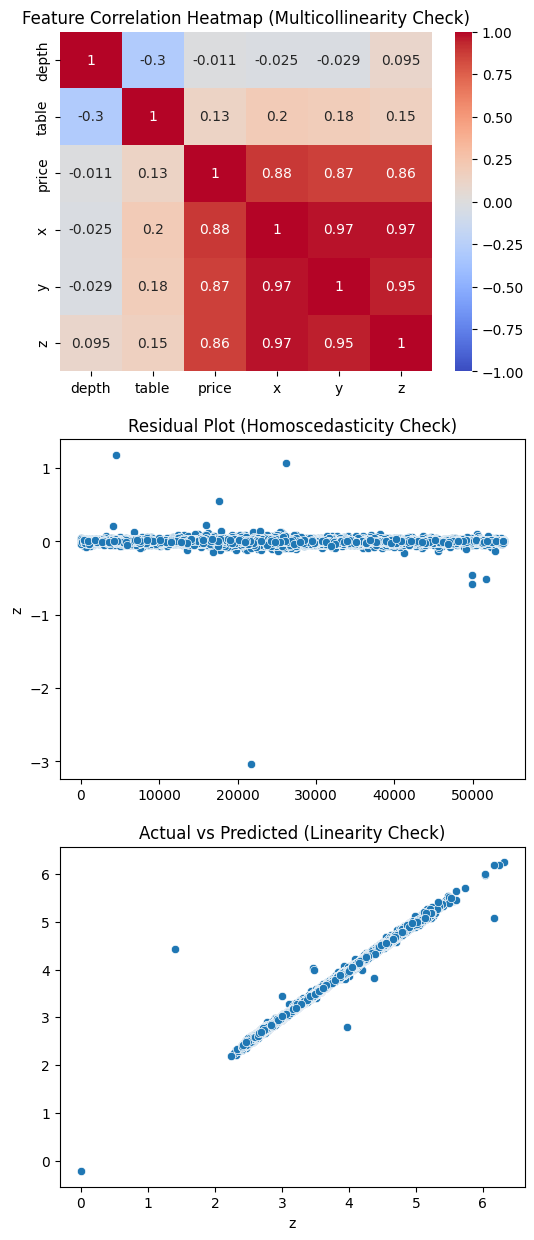

In [60]:
def assumption_test_plots(df,y_test,y_pred):
  import seaborn as sns
  ##To see multicollinearity

  fig,axes = plt.subplots(nrows=3, figsize = (6,15))

  correlation = df.corr()
  sns.heatmap(correlation,vmax = 1,vmin = -1,cmap='coolwarm',annot=True,ax = axes[0])

  ##To see homoscedasticity
  error = y_test - y_pred
  sns.scatterplot(error,ax = axes[1])
  ##To see linearity

  sns.scatterplot(x=y_test, y=y_pred, ax=axes[2])

  axes[0].set_title("Feature Correlation Heatmap (Multicollinearity Check)")
  axes[1].set_title("Residual Plot (Homoscedasticity Check)")
  axes[2].set_title("Actual vs Predicted (Linearity Check)")

  plt.show()

y_pred = lr.predict(x_test)

assumption_test_plots(df,y_test,y_pred)


###4. Write a Python script that creates a machine learning pipeline with feature scaling and evaluates the performance of different regression models.

In [89]:
def ml_models_evaluator(x_train, x_test, y_train, y_test, models):
  from sklearn.preprocessing import StandardScaler
  from sklearn.metrics import root_mean_squared_error,mean_absolute_error,mean_squared_error

  metrics = {}
  std = StandardScaler()
  x_train_scaled = std.fit_transform(x_train)
  x_test_scaled = std.transform(x_test)

  for name,model in models.items():

    model.fit(x_train_scaled,y_train)
    y_pred = model.predict(x_test_scaled)

    mse = mean_squared_error(y_test,y_pred)
    rmse = root_mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)

    metrics[f'mae for {name}'] = mse
    metrics[f'rmse for {name}'] = rmse
    metrics[f'mae for {name}'] = mae

  return metrics

models = {
    'Linear Regression (default)': LinearRegression(),
    'Linear Regression (no intercept)': LinearRegression(fit_intercept=False),
    'Ridge Regression (alpha=1.0, solver="auto")': Ridge(alpha=1.0, solver="auto"),
    'Ridge Regression (alpha=5.0, solver="saga")': Ridge(alpha=5.0, solver="saga"),
    'Lasso Regression (alpha=0.1, max_iter=5000)': Lasso(alpha=0.1, max_iter=5000),
    'Lasso Regression (alpha=1.0, tol=0.001)': Lasso(alpha=1.0, tol=0.001),
}

abc = ml_models_evaluator(x_train,x_test,y_train,y_test,models)
abc


{'mae for Linear Regression (default)': 0.015335708726415155,
 'rmse for Linear Regression (default)': 0.03691254071414503,
 'mae for Linear Regression (no intercept)': 3.539838344247741,
 'rmse for Linear Regression (no intercept)': 3.5400307929516552,
 'mae for Ridge Regression (alpha=1.0, solver="auto")': 0.015332356882937935,
 'rmse for Ridge Regression (alpha=1.0, solver="auto")': 0.03691032597511609,
 'mae for Ridge Regression (alpha=5.0, solver="saga")': 0.015315654937063496,
 'rmse for Ridge Regression (alpha=5.0, solver="saga")': 0.03690061992357052,
 'mae for Lasso Regression (alpha=0.1, max_iter=5000)': 0.10976565342723307,
 'rmse for Lasso Regression (alpha=0.1, max_iter=5000)': 0.137538544349236,
 'mae for Lasso Regression (alpha=1.0, tol=0.001)': 0.5912978708129399,
 'rmse for Lasso Regression (alpha=1.0, tol=0.001)': 0.6927144411892484}

###5.  Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and R-squared score.

In [96]:
iris = sns.load_dataset("iris")
y = iris['petal_width']
x = iris.drop(columns=['species','petal_width'])


In [100]:
lr = LinearRegression()

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 42)

lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

coefficent = lr.coef_
intercept = lr.intercept_
r_2_score = r2_score(y_test,y_pred)


print(f'coefficents are {coefficent} , intercept is {intercept} and r2_score is {r_2_score}')

coefficents are [-0.24488106  0.24482729  0.53764071] , intercept is -0.14916391036571586 and r2_score is 0.9368671270670573


###6.  Write a Python script that analyzes the relationship between total bill and tip in the 'tips' dataset using simple linear regression and visualizes the results.

In [138]:
tips = sns.load_dataset('tips')

In [139]:
tips.sample()

,total_bill,tip,sex,smoker,day,time,size
27,12.69,2.0,Male,No,Sat,Dinner,2


In [140]:
X = tips[['total_bill']]
y = tips['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

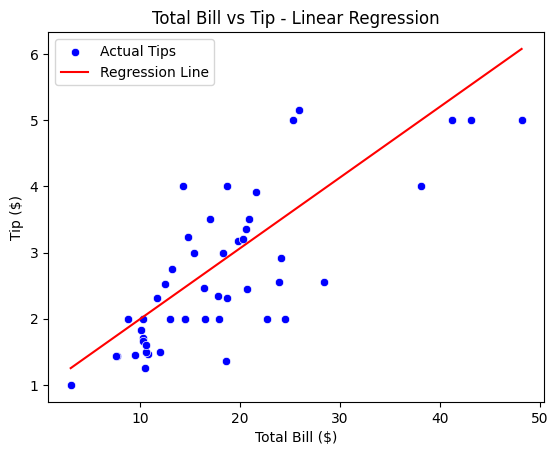

In [143]:
sns.scatterplot(x=X_test['total_bill'], y=y_test, color='blue', label="Actual Tips")
sns.lineplot(x=X_test['total_bill'], y=y_pred, color='red', label="Regression Line")
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip ($)")
plt.title("Total Bill vs Tip - Linear Regression")
plt.legend()
plt.show()

###7.  Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the model to predict new values and plot the data points along with the regression line.

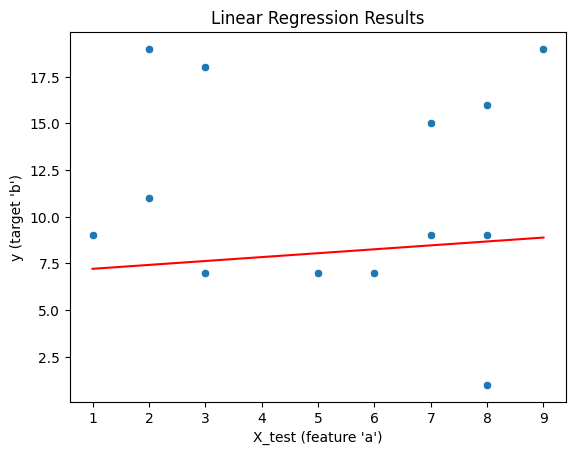

In [191]:
np.random.seed(22)
a = np.random.randint(1, 10, 50)
b = np.random.randint(1, 20, 50)

data = pd.DataFrame({'a': a})
data['b'] = b

a = data[['a']]
b = data['b']

X_train, X_test, y_train, y_test = train_test_split(a, b, test_size=0.25, random_state=42)

model_1 = LinearRegression()
model_1.fit(X_train, y_train)

y_pred = model_1.predict(X_test)

X_test_values = X_test['a'].values

sns.scatterplot(x=X_test_values, y=y_test)
sns.lineplot(x=X_test_values, y=y_pred, color='red')
plt.xlabel("X_test (feature 'a')")
plt.ylabel("y (target 'b')")
plt.title("Linear Regression Results")
plt.show()


###8.  Write a Python script that pickles a trained linear regression model and saves it to a file.

In [192]:
import pickle
with open('lr_model.pkl','wb') as file:
  pickle.dump(model_1,file)

###9. Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the regression curve.

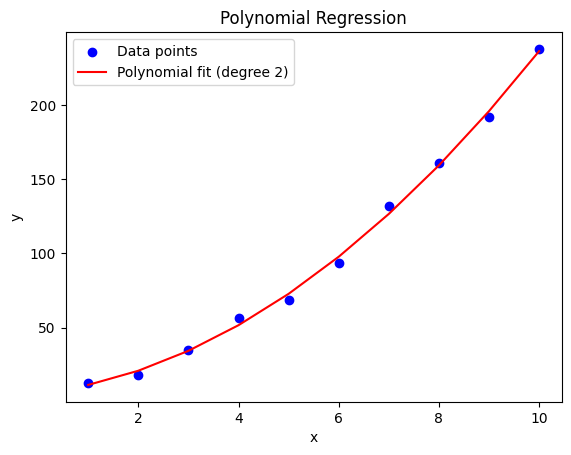

In [265]:
np.random.seed(42)
x = np.linspace(1, 10, 10).reshape(-1,1)
y = 2 * x**2 + 3 * x + 5 + np.random.normal(0, 5, size=x.shape)
poly = PolynomialFeatures(2)
x_poly = poly.fit_transform(x)

lin = LinearRegression()
lin.fit(x_poly,y)
y_pred = lin.predict(x_poly)

plt.scatter(x=x,y=y, color='blue', label='Data points')
plt.plot(x, y_pred, color='red', label='Polynomial fit (degree 2)')
plt.title("Polynomial Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

###10.  Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear regression model to the data. Print the model's coefficient and intercept

In [286]:
np.random.seed(34)
x= np.random.randint(1,10,50).reshape(-1,1)
y= np.random.randint(1,10,50)

lr = LinearRegression()
lr.fit(x,y)
print(f'The coefficent is {lr.coef_} ,and the intercept is {lr.intercept_}')

The coefficent is [0.07856001] ,and the intercept is 4.278492724367061


###11.  Write a Python script that fits polynomial regression models of different degrees to a synthetic dataset and compares their performance.

In [318]:
def poly_reg(x,degree,target):

  from sklearn.preprocessing import PolynomialFeatures
  from sklearn.linear_model import LinearRegression
  from sklearn.metrics import mean_absolute_error,mean_squared_error

  x_train, x_test, y_train, y_test = train_test_split(x, target, test_size=0.2, random_state=42)

  metrics = {}
  for i in range(1, degree + 1):
    poly = PolynomialFeatures(i)
    x_scaled = poly.fit_transform(x_train)
    x_test_scaled = poly.transform(x_test)

    lr = LinearRegression()
    lr.fit(x_scaled,y_train)

    y_pred = lr.predict(x_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    metrics[f'mae for {i} polynomial'] = mse
    metrics[f'rmse for {i} polynomial'] = rmse
    metrics[f'mae for {i} polynomial'] = mae

  return metrics

In [319]:
x = np.random.randint(1, 10, 50).reshape(-1, 1)  # Example feature data
target = 2 * x**2 + 3 * x + 5 + np.random.normal(0, 5, size=x.shape)  # Example target

degree = 4
metrics = poly_reg(x, degree, target)

print(metrics)

{'mae for 1 polynomial': 9.308506199311633, 'rmse for 1 polynomial': 10.792578882698525, 'mae for 2 polynomial': 3.5362763552849055, 'rmse for 2 polynomial': 5.103816821903644, 'mae for 3 polynomial': 3.3645083809705327, 'rmse for 3 polynomial': 5.0177966956509055, 'mae for 4 polynomial': 3.2861553837571393, 'rmse for 4 polynomial': 4.966114788558263}


###12.  Write a Python script that fits a simple linear regression model with two features and prints the model's coefficients, intercept, and R-squared score.

In [324]:
def two_feature_reg(df, target):
  import pandas as pd
  from sklearn.preprocessing import StandardScaler
  from sklearn.metrics import r2_score

  X = df.drop(columns = [target])
  y = df[target]

  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  std = StandardScaler()
  x_train_scaled = std.fit_transform(x_train)
  x_test_scaled = std.transform(x_test)
  lr = LinearRegression()
  lr.fit(x_train_scaled,y_train)
  y_pred = lr.predict(x_test_scaled)

  r2_value = r2_score(y_test,y_pred)
  coefficent = lr.coef_
  intercept = lr.intercept_
  return r2_value,coefficent,intercept



In [327]:
df = iris[['sepal_length','sepal_width','petal_length']]
r2,coeff,intercept = two_feature_reg(df,target = 'petal_length')
r2,coeff,intercept

(0.8924486678535347, array([ 1.44036427, -0.59999388]), 3.7266666666666657)

###13. Write a Python script that generates synthetic data, fits a linear regression model, and visualizes the regression line along with the data points.

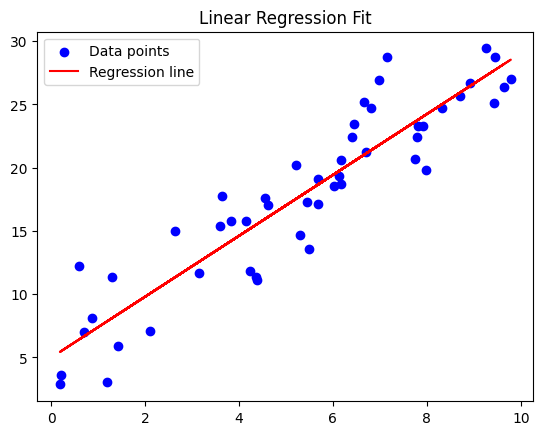

In [332]:
np.random.seed(0)
x = np.random.rand(50, 1) * 10
y = 2.5 * x + 5 + np.random.randn(50, 1) * 3

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y_pred, color='red', label='Regression line')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()


###14.  Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset with multiple features.

In [338]:
iris = iris.drop(columns = ['species'])
#a = variance_inflation_factor(iris['petal_length'])

In [344]:
vif_df = pd.DataFrame()
vif_df['features'] = iris.columns
vif_df['VIF_value'] = [variance_inflation_factor(iris.values,i) for i in range(len(iris.columns))]
vif_df

,features,VIF_value
0,sepal_length,262.969348
1,sepal_width,96.353292
2,petal_length,172.960962
3,petal_width,55.502060


###15. Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a polynomial regression model, and plots the regression curve.

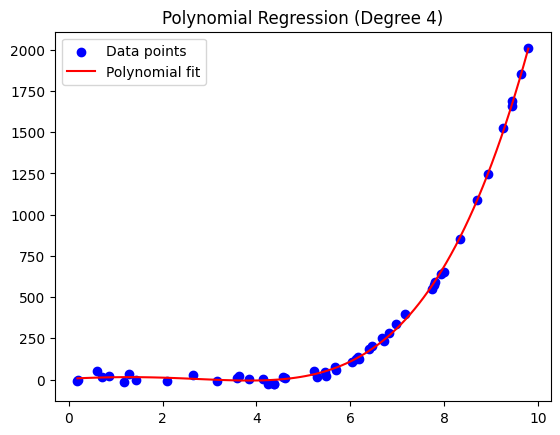

In [345]:
np.random.seed(0)
x = np.random.rand(50, 1) * 10
y = 0.5 * x**4 - 3 * x**3 + 2 * x**2 + 5 * x + 10 + np.random.randn(50, 1) * 20

poly = PolynomialFeatures(degree=4)
x_poly = poly.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_pred = model.predict(x_poly)

x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
y_range = model.predict(poly.transform(x_range))

plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x_range, y_range, color='red', label='Polynomial fit')
plt.title('Polynomial Regression (Degree 4)')
plt.legend()
plt.show()


###16.  Write a Python script that creates a machine learning pipeline with data standardization and a multiple linear regression model, and prints the R-squared score.

In [348]:
np.random.seed(0)
x = np.random.rand(100, 3) * 10
y = 3 * x[:, 0] + 2 * x[:, 1] - 4 * x[:, 2] + 5 + np.random.randn(100) * 3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

pipeline = make_pipeline(StandardScaler(), LinearRegression())
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

print("R-squared score:", r2_score(y_test, y_pred))

R-squared score: 0.9517944223779254


###17.  Write a Python script that performs polynomial regression (degree 3) on a synthetic dataset and plots the regression curve.

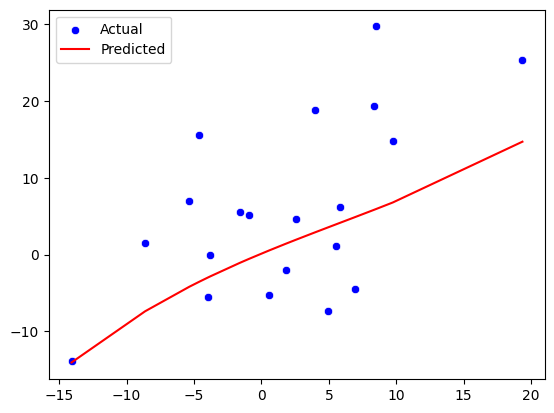

In [383]:
np.random.seed(43)
x = np.random.randn(100,1) *10
y = 3 * x[:, 0] + 2 * x[:, 0] - 4 * x[:, 0] + 10*np.random.randn(100)

poly_3 = PolynomialFeatures(3)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

x_train_scaled = poly_3.fit_transform(x_train)
x_test_scaled = poly_3.transform(x_test)

lr = LinearRegression()
lr.fit(x_train_scaled,y_train)
y_pred = lr.predict(x_test_scaled)


x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)

sns.scatterplot(x = x_test.flatten(),y = y_test, color ='blue', label = 'Actual')
sns.lineplot(x = x_test.flatten(),y = y_pred, color = 'red', label = 'Predicted')
plt.legend()
plt.show()



###18.  Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features. Print the R-squared score and model coefficients.

In [384]:
np.random.seed(42)
x = np.random.rand(100, 5) * 10
y = 3 * x[:, 0] + 2 * x[:, 1] + 1.5 * x[:, 2] + 4 * x[:, 3] + 0.5 * x[:, 4] + np.random.randn(100) * 5  # Linear relation with some noise

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("R-squared score:", r2_score(y_test, y_pred))
print("Model coefficients:", model.coef_)
print("Intercept:", model.intercept_)

R-squared score: 0.8821536746547551
Model coefficients: [2.82647934 1.88303834 1.82395165 4.0727923  0.27717992]
Intercept: 0.7299237199349662


###19.  Write a Python script that generates synthetic data for linear regression, fits a model, and visualizes the data points along with the regression line.

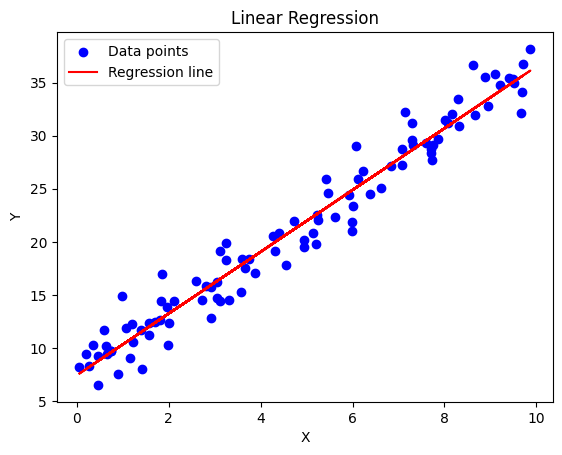

In [385]:
np.random.seed(42)
x = np.random.rand(100, 1) * 10
y = 3 * x + 7 + np.random.randn(100, 1) * 2

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y_pred, color='red', label='Regression line')
plt.legend()
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

###20.  Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's Rsquared score and coefficients.




In [387]:
x = np.random.randn(100,3)
y = 3*x[:,0] + 4*x[:,1] -6*x[:,2] + np.random.rand(100)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("R-squared score:", r2_score(y_test, y_pred))
print("Model coefficients:", model.coef_)

R-squared score: 0.9976077923609568
Model coefficients: [ 2.98220472  4.02155634 -5.93974969]


###21.  Write a Python script that demonstrates how to serialize and deserialize machine learning models using joblib instead of pickling.

In [388]:
import joblib

joblib.dump(model,'linear_regression_model.joblib')



['linear_regression_model.joblib']

In [390]:
lr_model = joblib.load('linear_regression_model.joblib')
type(lr_model)

sklearn.linear_model._base.LinearRegression

###22. Write a Python script to perform linear regression with categorical features using one-hot encoding. Use the Seaborn 'tips' dataset.

In [391]:
tips = sns.load_dataset('tips')


In [464]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [465]:
tips['sex'] = tips['sex'].map({'Male':1,'Female':0})
tips['smoker'] = tips['smoker'].map({'Yes':1,'No':0})
#OneHotEncoding
tips = pd.get_dummies(data = tips , columns=['day'],dtype = bool)
tips[['day_Thur'	,'day_Fri'	,'day_Sat','day_Sun']] = tips.select_dtypes(include=bool).astype(int)
tips = pd.get_dummies(data = tips , columns=['time'],dtype = bool)
tips[['time_Lunch',	'time_Dinner']] = tips.select_dtypes(include=bool).astype(int)


In [469]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'size', 'day_Thur', 'day_Fri',
       'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner'],
      dtype='object')

In [471]:
x = tips.drop(columns = ['total_bill'])
y = tips['total_bill']

In [475]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print('Mean square erroe is :', mse)

Mean square erroe is : 31.873635550729947


In [478]:
rgr = Ridge()
lr = LinearRegression()

x = np.random.randn(100,3)
y = 3*x[:,0] + 4*x[:,1] -6*x[:,2] + np.random.rand(100)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
##Using the same data from above

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print('Mean square erroe is :', mse)

rgr.fit(x_train, y_train)
y_pred = rgr.predict(x_test)
mse_1 = mean_squared_error(y_test,y_pred)
print('Mean square erroe is :', mse_1)



Mean square erroe is : 0.06288046970752315
Mean square erroe is : 0.041988381560808946


The mean square error is lower for the ridge regression.

###24. Write a Python script that uses cross-validation to evaluate a Linear Regression model on a synthetic dataset.

In [13]:
np.random.seed(11)
x = np.random.randn(100,3)
y = 3*x[:,0] + 4*x[:,1] -6*x[:,2] + np.random.rand(100)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
lr = LinearRegression()
k_folds = KFold(n_splits = 5)
scores = cross_val_score(lr,x_train,y_train,cv = k_folds)

print('Cross Validation score',scores)
print('Mean Cross Validation score',np.mean(scores))

Cross Validation score [0.99760914 0.99834999 0.99804758 0.99800783 0.99873492]
Mean Cross Validation score 0.9981498925974991


###25.  Write a Python script that compares polynomial regression models of different degrees and prints the Rsquared score for each.

In [48]:

x = np.random.randn(100,3)
y = 3 * x[:, 0] + 2 * x[:, 0] - 4 * x[:, 0] + 10*np.random.randn(100)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

degree = np.arange(2,7)
metrics = {}
for i in degree:
  poly = PolynomialFeatures(i)
  x_train_scaled = poly.fit_transform(x_train)
  x_test_scaled = poly.transform(x_test)

  lr = LinearRegression()
  lr.fit(x_train_scaled,y_train)
  y_pred = lr.predict(x_test_scaled)

  mse = mean_squared_error(y_test,y_pred)
  metrics[f'degree {i}'] = round(mse,2)


In [49]:
df = pd.DataFrame({'degree':metrics.keys(),'mse':metrics.values()})
df = df.sort_values(by = 'mse')
df.head()

,degree,mse
0,degree 2,83.92
1,degree 3,128.29
2,degree 4,135.53
3,degree 5,10997.32
4,degree 6,635766.82
